In [1]:
from pandas import DataFrame, read_csv
from matplotlib.pyplot import figure, title, savefig, show
from seaborn import heatmap
from matplotlib.pyplot import figure, savefig, show
from libs.ds_charts import bar_chart, get_variable_types
import numpy as np
from pandas import read_csv, concat, unique, DataFrame
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
import numpy as np
from pandas import DataFrame, read_csv, unique
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier

ISTO E APLICADO ANTES DO TRAIN/ TEST SPLIT -> porque o test tem de ter as mesmas features do train!

In [2]:
filename = 'data/air_quality_dummified.csv'
data = read_csv(filename, na_values='?')
data.shape

(161631, 60)

In [3]:
THRESHOLD = 0.9

def select_redundant(corr_mtx, threshold: float) -> tuple[dict, DataFrame]:
    if corr_mtx.empty:
        return {}

    corr_mtx = abs(corr_mtx)
    vars_2drop = {}
    for el in corr_mtx.columns:
        el_corr = (corr_mtx[el]).loc[corr_mtx[el] >= threshold]
        if len(el_corr) == 1:
            corr_mtx.drop(labels=el, axis=1, inplace=True)
            corr_mtx.drop(labels=el, axis=0, inplace=True)
        else:
            vars_2drop[el] = el_corr.index
    return vars_2drop, corr_mtx

drop, corr_mtx = select_redundant(data.corr(), THRESHOLD)
print(drop.keys())

dict_keys(['CO_Max', 'CO_Std', 'PM2.5_Max', 'PM2.5_Std', 'PM10_Max', 'PM10_Std', 'SO2_Max', 'SO2_Std'])


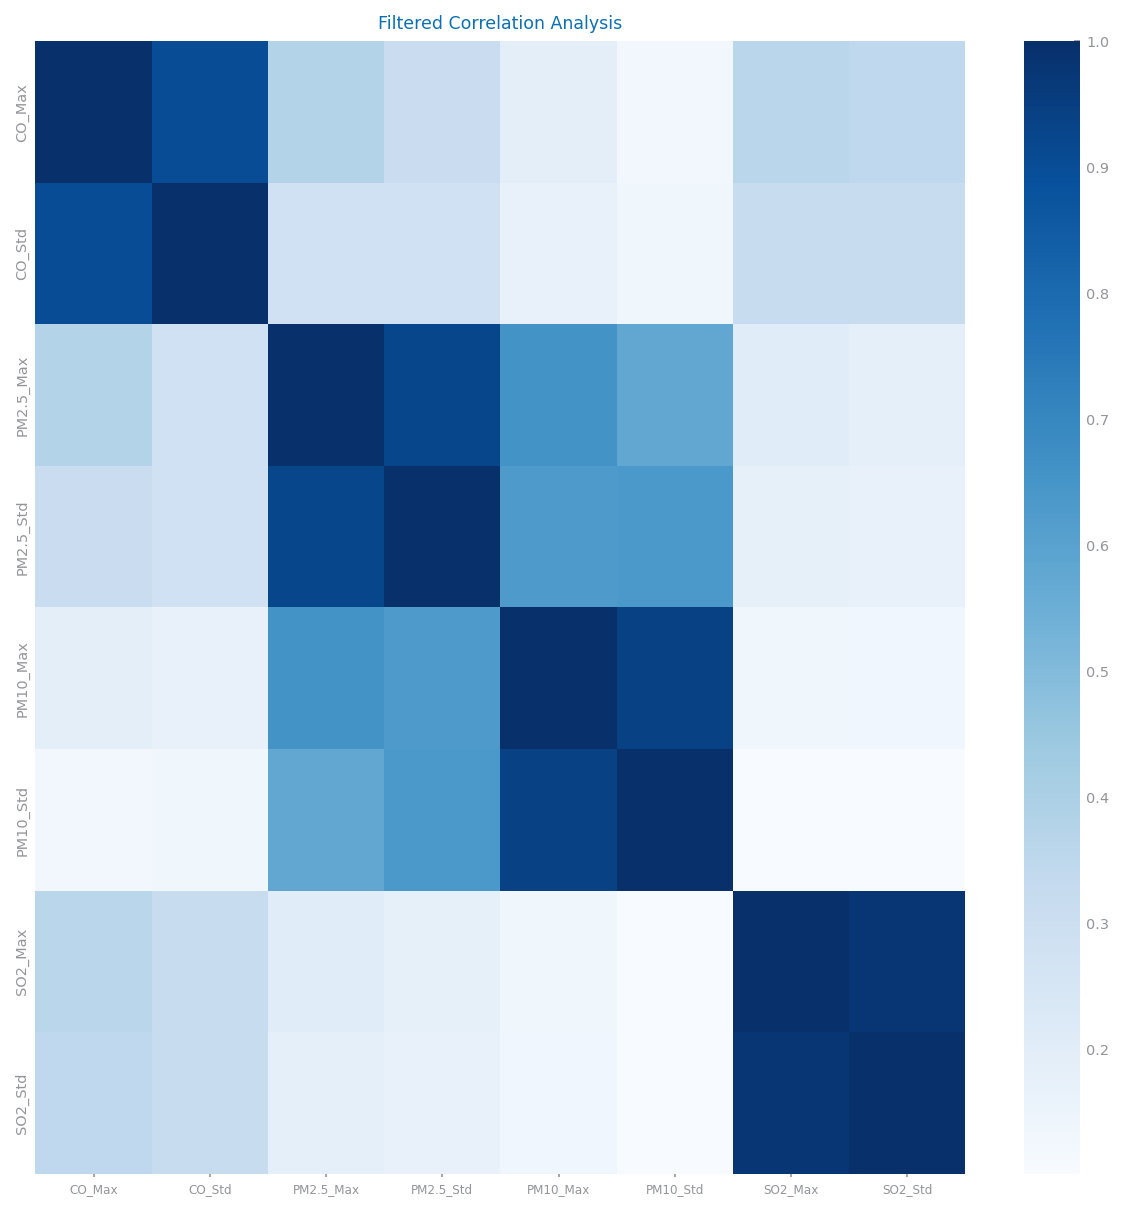

In [4]:
if corr_mtx.empty:
    raise ValueError('Matrix is empty.')

figure(figsize=[10, 10])
heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=False, cmap='Blues')
title('Filtered Correlation Analysis')
savefig(f'lab6_images/dataset_2/filtered_correlation_analysis_d2_{THRESHOLD}.png')
show()

In [5]:
def drop_redundant(data: DataFrame, vars_2drop: dict) -> DataFrame:
    sel_2drop = []
    print(vars_2drop.keys())
    for key in vars_2drop.keys():
        if key not in sel_2drop:
            for r in vars_2drop[key]:
                if r != key and r not in sel_2drop:
                    sel_2drop.append(r)
    print('Variables to drop', sel_2drop)
    df = data.copy()
    for var in sel_2drop:
        df.drop(labels=var, axis=1, inplace=True)
    return df
df = drop_redundant(data, drop)
df

dict_keys(['CO_Max', 'CO_Std', 'PM2.5_Max', 'PM2.5_Std', 'PM10_Max', 'PM10_Std', 'SO2_Max', 'SO2_Std'])
Variables to drop ['CO_Std', 'PM2.5_Std', 'PM10_Std', 'SO2_Std']


,ALARM,CO_Mean,CO_Min,CO_Max,NO2_Mean,NO2_Min,NO2_Max,NO2_Std,O3_Mean,O3_Min,...,Prov_EN_Sichuan,Prov_EN_Tianjin,Prov_EN_Xinjiang,Prov_EN_Xizang,Prov_EN_Yunnan,Prov_EN_Zhejiang,date_1,date_2,date_3,date_4
0,Safe,0.792917,0.60,1.09,48.875000,36.0,62.0,7.704504,10.291667,4.0,...,False,False,False,False,False,False,True,False,False,False
1,Safe,1.157083,0.71,1.46,72.916667,64.0,88.0,8.683877,10.041667,5.0,...,False,True,False,False,False,False,True,False,False,False
2,Safe,1.489167,1.17,1.94,63.875000,52.0,80.0,9.319838,11.750000,6.0,...,False,False,False,False,False,False,True,False,False,False
3,Safe,1.882083,1.10,4.22,69.625000,60.0,90.0,9.911326,11.166667,7.0,...,False,False,False,False,False,False,True,False,False,False
4,Safe,1.389583,0.78,2.14,44.750000,23.0,66.0,13.386094,22.208333,7.0,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161626,Danger,0.804167,0.70,0.85,20.000000,15.0,27.0,3.674235,77.416667,46.0,...,False,False,False,False,False,False,False,False,False,True
161627,Safe,0.575000,0.40,0.90,17.833333,12.0,39.0,7.121954,50.708333,8.0,...,False,False,False,False,True,False,False,False,False,True
161628,Danger,0.389583,0.15,0.90,29.250000,15.0,61.0,13.354930,79.291667,22.0,...,False,False,False,False,False,False,False,False,False,True
161629,Danger,0.639583,0.40,0.90,24.375000,12.0,51.0,10.201358,67.958333,37.0,...,False,False,True,False,False,False,False,False,False,True


22 ['CO_Mean', 'CO_Max', 'NO2_Mean', 'NO2_Min', 'NO2_Max', 'NO2_Std', 'O3_Mean', 'O3_Min', 'O3_Max', 'O3_Std', 'PM2.5_Mean', 'PM2.5_Min', 'PM2.5_Max', 'PM2.5_Std', 'PM10_Mean', 'PM10_Min', 'PM10_Max', 'PM10_Std', 'SO2_Mean', 'SO2_Min', 'SO2_Max', 'SO2_Std']
['CO_Mean', 'CO_Max', 'NO2_Mean', 'NO2_Min', 'NO2_Max', 'NO2_Std', 'O3_Mean', 'O3_Min', 'O3_Max', 'O3_Std', 'PM2.5_Mean', 'PM2.5_Min', 'PM2.5_Max', 'PM2.5_Std', 'PM10_Mean', 'PM10_Min', 'PM10_Max', 'PM10_Std', 'SO2_Mean', 'SO2_Min', 'SO2_Max', 'SO2_Std']


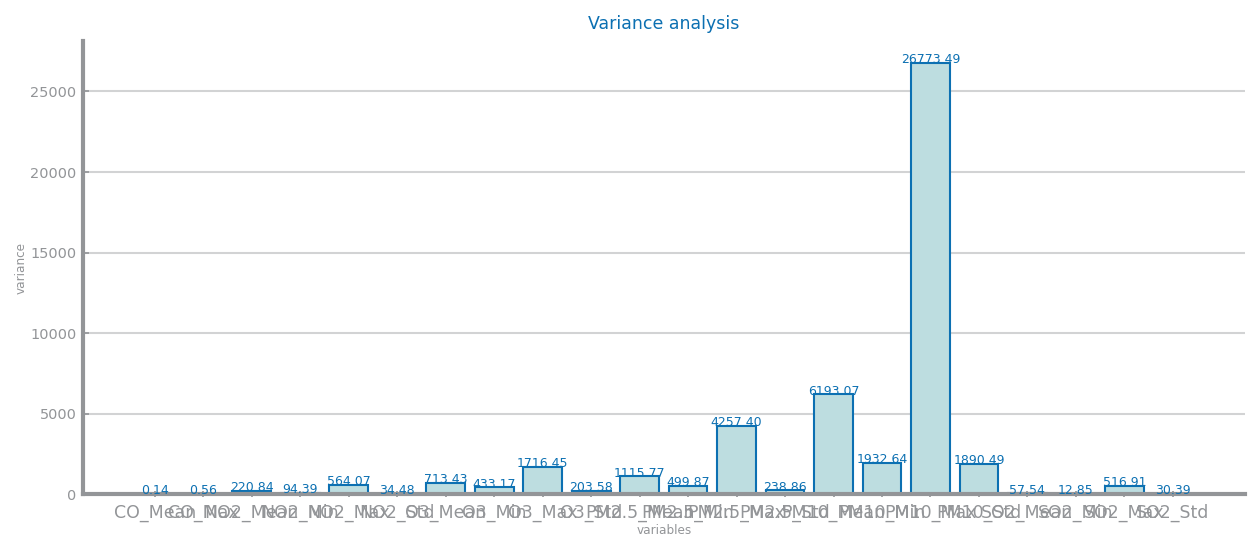

In [6]:
def select_low_variance(data: DataFrame, threshold: float) -> list:
    lst_variables = []
    lst_variances = []
    for el in data.columns:
        value = data[el].var()
        if value >= threshold:
            lst_variables.append(el)
            lst_variances.append(value)

    print(len(lst_variables), lst_variables)
    figure(figsize=[10, 4])
    bar_chart(lst_variables, lst_variances, title='Variance analysis', xlabel='variables', ylabel='variance')
    savefig('lab6_images/dataset_2/filtered_variance_analysis_ds2.png')
    return lst_variables

numeric = get_variable_types(data)['Numeric']
vars_2drop = select_low_variance(data[numeric], 0.1)
print(vars_2drop)

### Train Test Split with feature selection

In [7]:
target = 'ALARM'
positive = 'Injured'
negative = 'Danger'
values = {'Original': [len(df[df[target] == positive]), len(df[df[target] == negative])]}

y: np.ndarray = df.pop(target).values
X: np.ndarray = df.values
labels: np.ndarray = unique(y)
labels.sort()

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

train_new = concat([DataFrame(trnX, columns=df.columns), DataFrame(trnY,columns=[target])], axis=1)

test_new = concat([DataFrame(tstX, columns=df.columns), DataFrame(tstY,columns=[target])], axis=1)


### Naive Bayes Impact


In [8]:
target = 'ALARM'
trnY_new: np.ndarray = train_new.pop(target).values
trnX_new: np.ndarray = train_new.values
labels = unique(trnY_new)
labels.sort()

tstY_new: np.ndarray = test_new.pop(target).values
tstX_new: np.ndarray = test_new.values

clf = BernoulliNB()
clf.fit(trnX_new, trnY_new)
prd_trn = clf.predict(trnX_new)
prd_tst = clf.predict(tstX_new)
print(f1_score(tstY_new, prd_tst, pos_label='Danger'))
with_feature_selection = f1_score(tstY_new, prd_tst, pos_label='Danger')


0.0


In [9]:
train_old = read_csv(f'data/air_quality_scaled_zscore_train.csv')
test_old = read_csv(f'data/air_quality_scaled_zscore_test.csv')
#PREPARE TRAIN AND TEST SZCORE
target = 'ALARM'
trnY_old: np.ndarray = train_old.pop(target).values
trnX_old: np.ndarray = train_old.values
labels = unique(trnY_old)
labels.sort()

tstY_old: np.ndarray = test_old.pop(target).values
tstX_old: np.ndarray = test_old.values

clf = BernoulliNB()
clf.fit(trnX_old, trnY_old)
prd_trn = clf.predict(trnX_old)
prd_tst = clf.predict(tstX_old)
print(f1_score(tstY_old, prd_tst, pos_label='Danger'))
without_feature_selection = f1_score(tstY_old, prd_tst, pos_label='Danger')

FileNotFoundError: [Errno 2] No such file or directory: 'data/air_quality_scaled_zscore_train.csv'

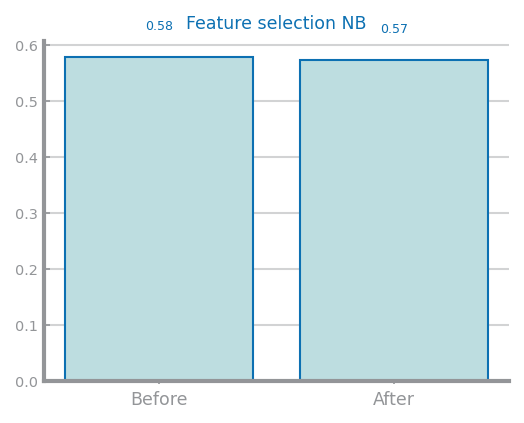

<Figure size 600x450 with 0 Axes>

In [ ]:
bar_chart(xvalues=['Before','After'],yvalues=[without_feature_selection,with_feature_selection],title="Feature selection NB")
show()
savefig('lab6_images/dataset_2/nb_before_after_ds2.png')

### KNN Impact

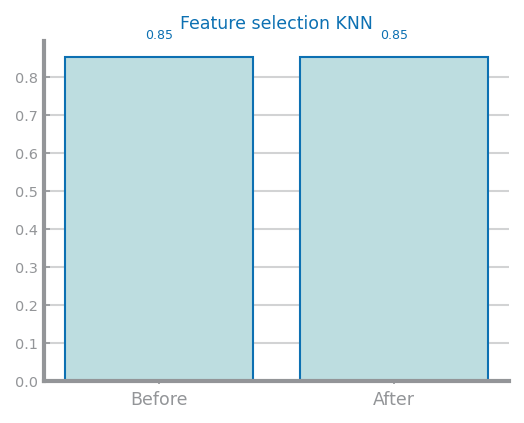

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#BEFORE
clf = knn = KNeighborsClassifier(n_neighbors=1, metric='manhattan')
clf.fit(trnX_old, trnY_old)
prd_trn = clf.predict(trnX_old)
prd_tst = clf.predict(tstX_old)
knn_old = f1_score(tstY_old, prd_tst, pos_label='Danger')

#AFTER
clf = knn = KNeighborsClassifier(n_neighbors=1, metric='manhattan')
clf.fit(trnX_new, trnY_new)
prd_trn = clf.predict(trnX_new)
prd_tst = clf.predict(tstX_new)
knn_new = f1_score(tstY_new, prd_tst, pos_label='Danger')

bar_chart(xvalues=['Before','After'],yvalues=[knn_old,knn_new],title="Feature selection KNN")
savefig('lab6_images/dataset_2/knn_before_after_ds2.png')
show()

### Random Forests Impact

/Users/goncalofalcao/Desktop/IST/CD/ProjetoCD/dogit/projetoCD/libs/ds_charts.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xvalues, fontsize='small', ha='center')


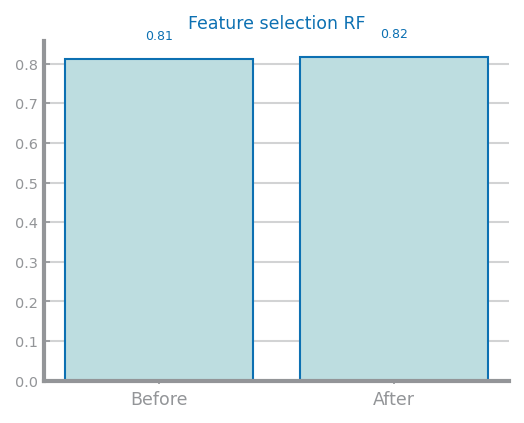

In [ ]:
#BEFORE
clf = RandomForestClassifier(n_estimators=125,max_depth=5,max_features=0.9)
clf.fit(trnX_old, trnY_old)
prd_trn = clf.predict(trnX_old)
prd_tst = clf.predict(tstX_old)
rf_old = f1_score(tstY_old, prd_tst, pos_label='Danger')

#AFTER
clf = RandomForestClassifier(n_estimators=125,max_depth=5,max_features=0.9)
clf.fit(trnX_new, trnY_new)
prd_trn = clf.predict(trnX_new)
prd_tst = clf.predict(tstX_new)
rf_new = f1_score(tstY_new, prd_tst, pos_label='Danger')

bar_chart(xvalues=['Before','After'],yvalues=[rf_old,rf_new],title="Feature selection RF")
savefig('lab6_images/dataset_2/rf_before_after_ds2.png')
show()
